# **Network Anomaly Detection System**
### **Name:** Gouri Nandhan P V

---

## **1. Problem Statement**
Network security is a critical concern in today's digital landscape. Anomalies in network traffic can indicate potential security threats, such as cyber-attacks, intrusions, or unauthorized access. The goal of this project is to develop a Machine Learning model that can accurately detect anomalous network activities.

---

## **2. Objective**
- Analyze network traffic data and identify patterns of normal and anomalous activities.
- Preprocess and clean the dataset for better model performance.
- Apply feature selection techniques to extract the most relevant features.
- Train and evaluate multiple Machine Learning models for anomaly detection.
- Compare model performances and select the best model for deployment.

---

## **3. Data Description**
The dataset used for this project is the **UNSW-NB15** dataset, a benchmark dataset for network intrusion detection. It contains a mix of normal and malicious traffic, with various attributes describing network behavior.

---

## **4. Target Variable**
The dataset has two primary labels:
- **label**: A binary classification variable (0 for normal traffic, 1 for anomalous traffic).
- **attack_cat**: A categorical variable indicating the type of attack (e.g., DoS, Exploit, Fuzzers).

---

## **5. Other Attributes**
The dataset contains multiple numerical and categorical attributes, including:
- **Network Protocols** (e.g., TCP, UDP)
- **Traffic Volume Metrics** (e.g., duration, packet sizes)
- **Flow Behavior Features** (e.g., number of packets sent/received)
- **Traffic Load Features** (e.gfirst and last few records
df.head(), df.tail()
he best-performing one for real-world deployment.  


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2

### Load & Dataset Shape  

In [4]:
df = pd.read_csv(r"C:\Users\gouri\OneDrive\Desktop\AI_Anomaly_detection_system\Training and Testing Sets\UNSW_NB15_training-set.csv")

In [5]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [6]:
df.tail()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1
175340,175341,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,16,30,0,0,0,30,30,0,Generic,1


In [7]:
print(f"Shape of dataset[rows, columns]: {df.shape}")

Shape of dataset[rows, columns]: (175341, 45)


### Statistical Summary

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,175341.0,8.767100e+04,5.061673e+04,1.0,43836.000000,87671.000000,1.315060e+05,1.753410e+05
dur,175341.0,1.359389e+00,6.480249e+00,0.0,0.000008,0.001582,6.680690e-01,5.999999e+01
spkts,175341.0,2.029866e+01,1.368876e+02,1.0,2.000000,2.000000,1.200000e+01,9.616000e+03
dpkts,175341.0,1.896959e+01,1.102583e+02,0.0,0.000000,2.000000,1.000000e+01,1.097400e+04
sbytes,175341.0,8.844844e+03,1.747656e+05,28.0,114.000000,430.000000,1.418000e+03,1.296523e+07
dbytes,175341.0,1.492892e+04,1.436542e+05,0.0,0.000000,164.000000,1.102000e+03,1.465555e+07
rate,175341.0,9.540619e+04,1.654010e+05,0.0,32.786140,3225.806520,1.250000e+05,1.000000e+06
sttl,175341.0,1.795470e+02,1.029400e+02,0.0,62.000000,254.000000,2.540000e+02,2.550000e+02
dttl,175341.0,7.960957e+01,1.105069e+02,0.0,0.000000,29.000000,2.520000e+02,2.540000e+02
sload,175341.0,7.345403e+07,1.883574e+08,0.0,13053.338870,879674.750000,8.888889e+07,5.988000e+09


### Data Information 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

### Checking for Missing & Duplicate Values 

In [13]:
is_null = df.isnull().sum()
print(f"Missing values count per column:\n {is_null}")

is_duplicated = df.duplicated().sum()
print(f"Duplicated values count in each row: {is_duplicated}")

df = df.drop_duplicates()
print(f"Dataset size after removing duplicates: {df.shape}")

Missing values count per column:
 id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0


### Data Types of Each Column
###  Identifying Categorical Columns

In [15]:
print(f"Data types of each column: \n {df.dtypes}")

Data types of each column: 
 id                     int64
dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm    

In [16]:
for i in df.columns:
    if df[i].dtype == "object":
        print(f"Column '{i}' is of type object (categorical/text).")

Column 'proto' is of type object (categorical/text).
Column 'service' is of type object (categorical/text).
Column 'state' is of type object (categorical/text).
Column 'attack_cat' is of type object (categorical/text).


### Class Distribution  

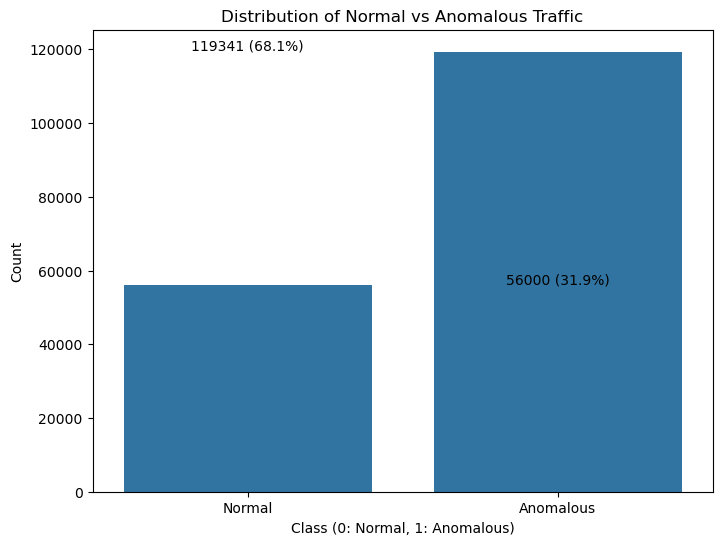

In [18]:
plt.figure(figsize=(8, 6))
class_counts = df['label'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Normal vs Anomalous Traffic')
plt.xlabel('Class (0: Normal, 1: Anomalous)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Anomalous'])
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 500, f"{v} ({v/df.shape[0]*100:.1f}%)", ha='center')
plt.show()

## Distribution of Normal vs. Anomalous Traffic
- **Normal Traffic**: 119,341 instances (68.1%)
- **Anomalous Traffic**: 56,000 instances (31.9%)
- **Observation**:  
  - The dataset is moderately imbalanced, with more normal traffic than anomalous.  
  - The imbalance is not extreme, which is beneficial for training models without requiring significant resampling.


### Attack Category Distribution 

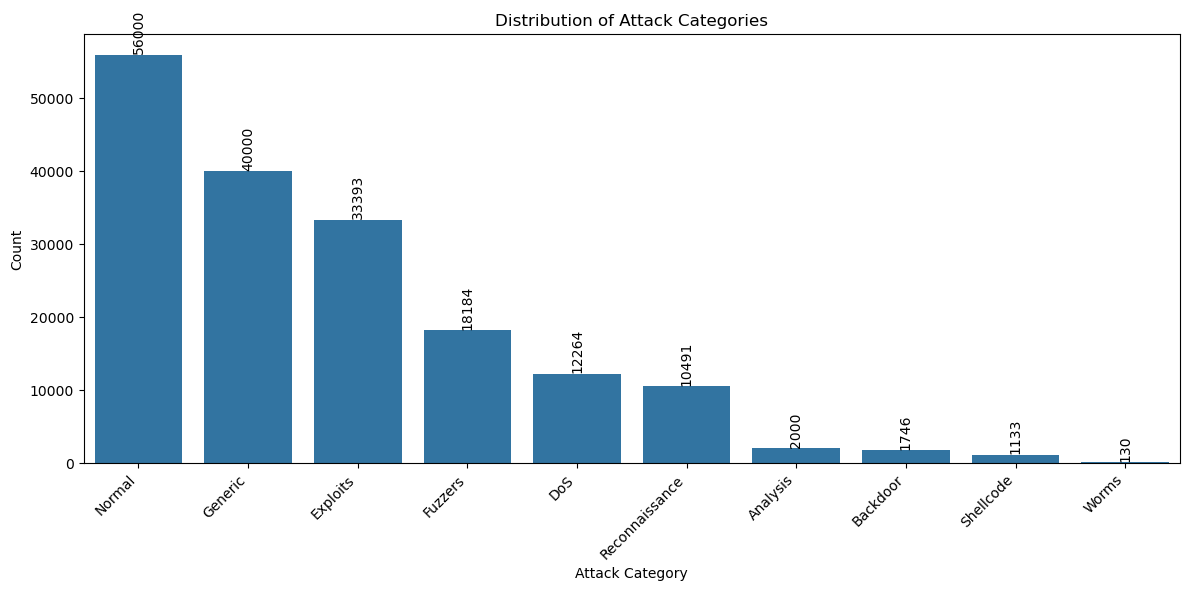

In [21]:
plt.figure(figsize=(12, 6))
attack_counts = df['attack_cat'].value_counts()
sns.barplot(x=attack_counts.index, y=attack_counts.values)
plt.title('Distribution of Attack Categories')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(attack_counts.values):
    plt.text(i, v + 500, f"{v}", ha='center', rotation=90)
plt.tight_layout()
plt.show()


## Distribution of Attack Categories
- **Top attack categories**:  
  - **Generic**: 40,000  
  - **Exploits**: 33,393  
  - **Fuzzers**: 18,184  
  - **DoS**: 12,264  
  - **Reconnaissance**: 10,491  
- **Lesser frequent attacks**:  
  - Analysis, Backdoor, Shellcode, and Worms (each below 2,000 instances)  
- **Observation**:  
  - Generic and Exploit-based attacks are the most common.
  - These should be a primary focus for model evaluation and mitigation strategies.

### Top 20 Most Frequent Network Protocols  

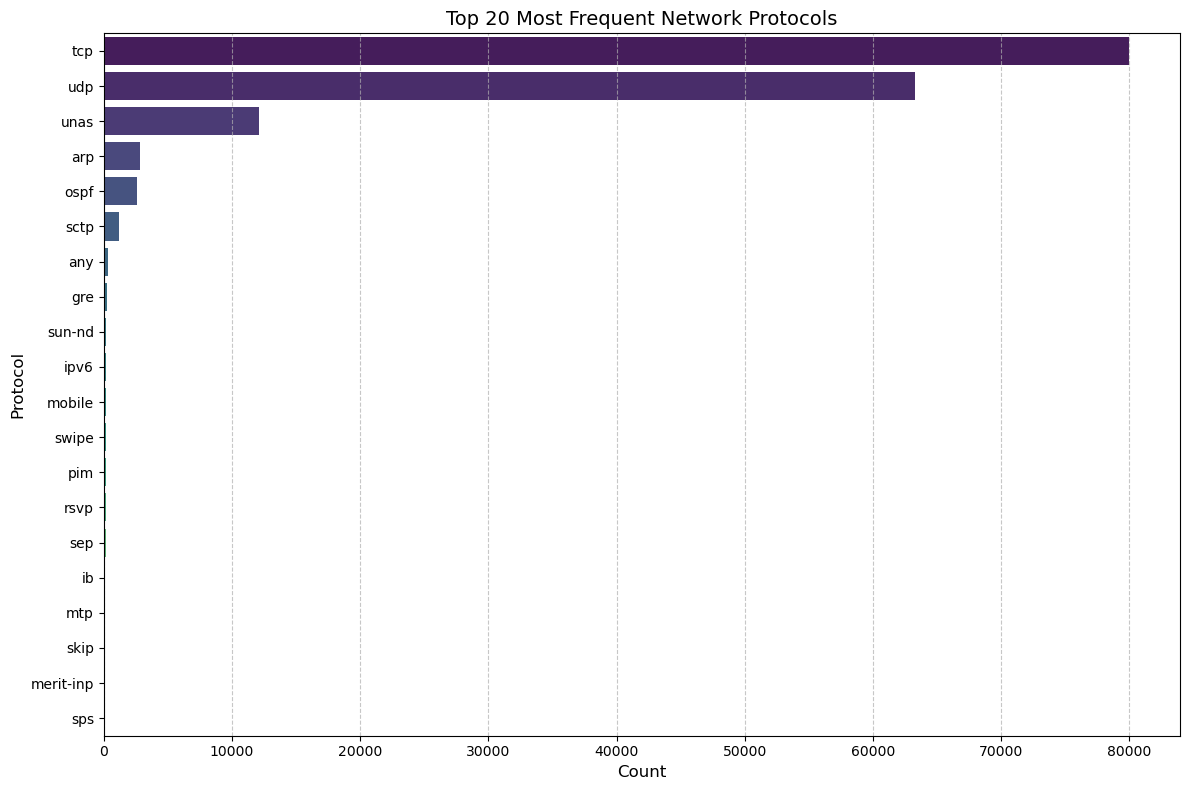

In [24]:
# Sort protocols by count
proto_counts = df['proto'].value_counts()

# Limit to top 20 protocols (adjust as needed)
top_n = 20  
proto_counts = proto_counts[:top_n]

plt.figure(figsize=(12, 8))  
sns.barplot(
    y=proto_counts.index, 
    x=proto_counts.values, 
    hue=proto_counts.index,  
    palette="viridis", 
    legend=False  
)

plt.title(f'Top {top_n} Most Frequent Network Protocols', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Protocol', fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add subtle grid lines
plt.tight_layout()

plt.show()

## Top 20 Most Frequent Network Protocols
- **Most used protocols**:  
  - **TCP** and **UDP** dominate, with TCP having the highest count.  
  - **UNAS, ARP, and OSPF** follow but with significantly lower frequencies.  
- **Observation**:  
  - The dominance of TCP and UDP suggests that many anomalies occur in commonly used protocols.  
  - Protocol-specific anomaly detection could enhance accuracy.

### Outlier Detection Using Boxplots  

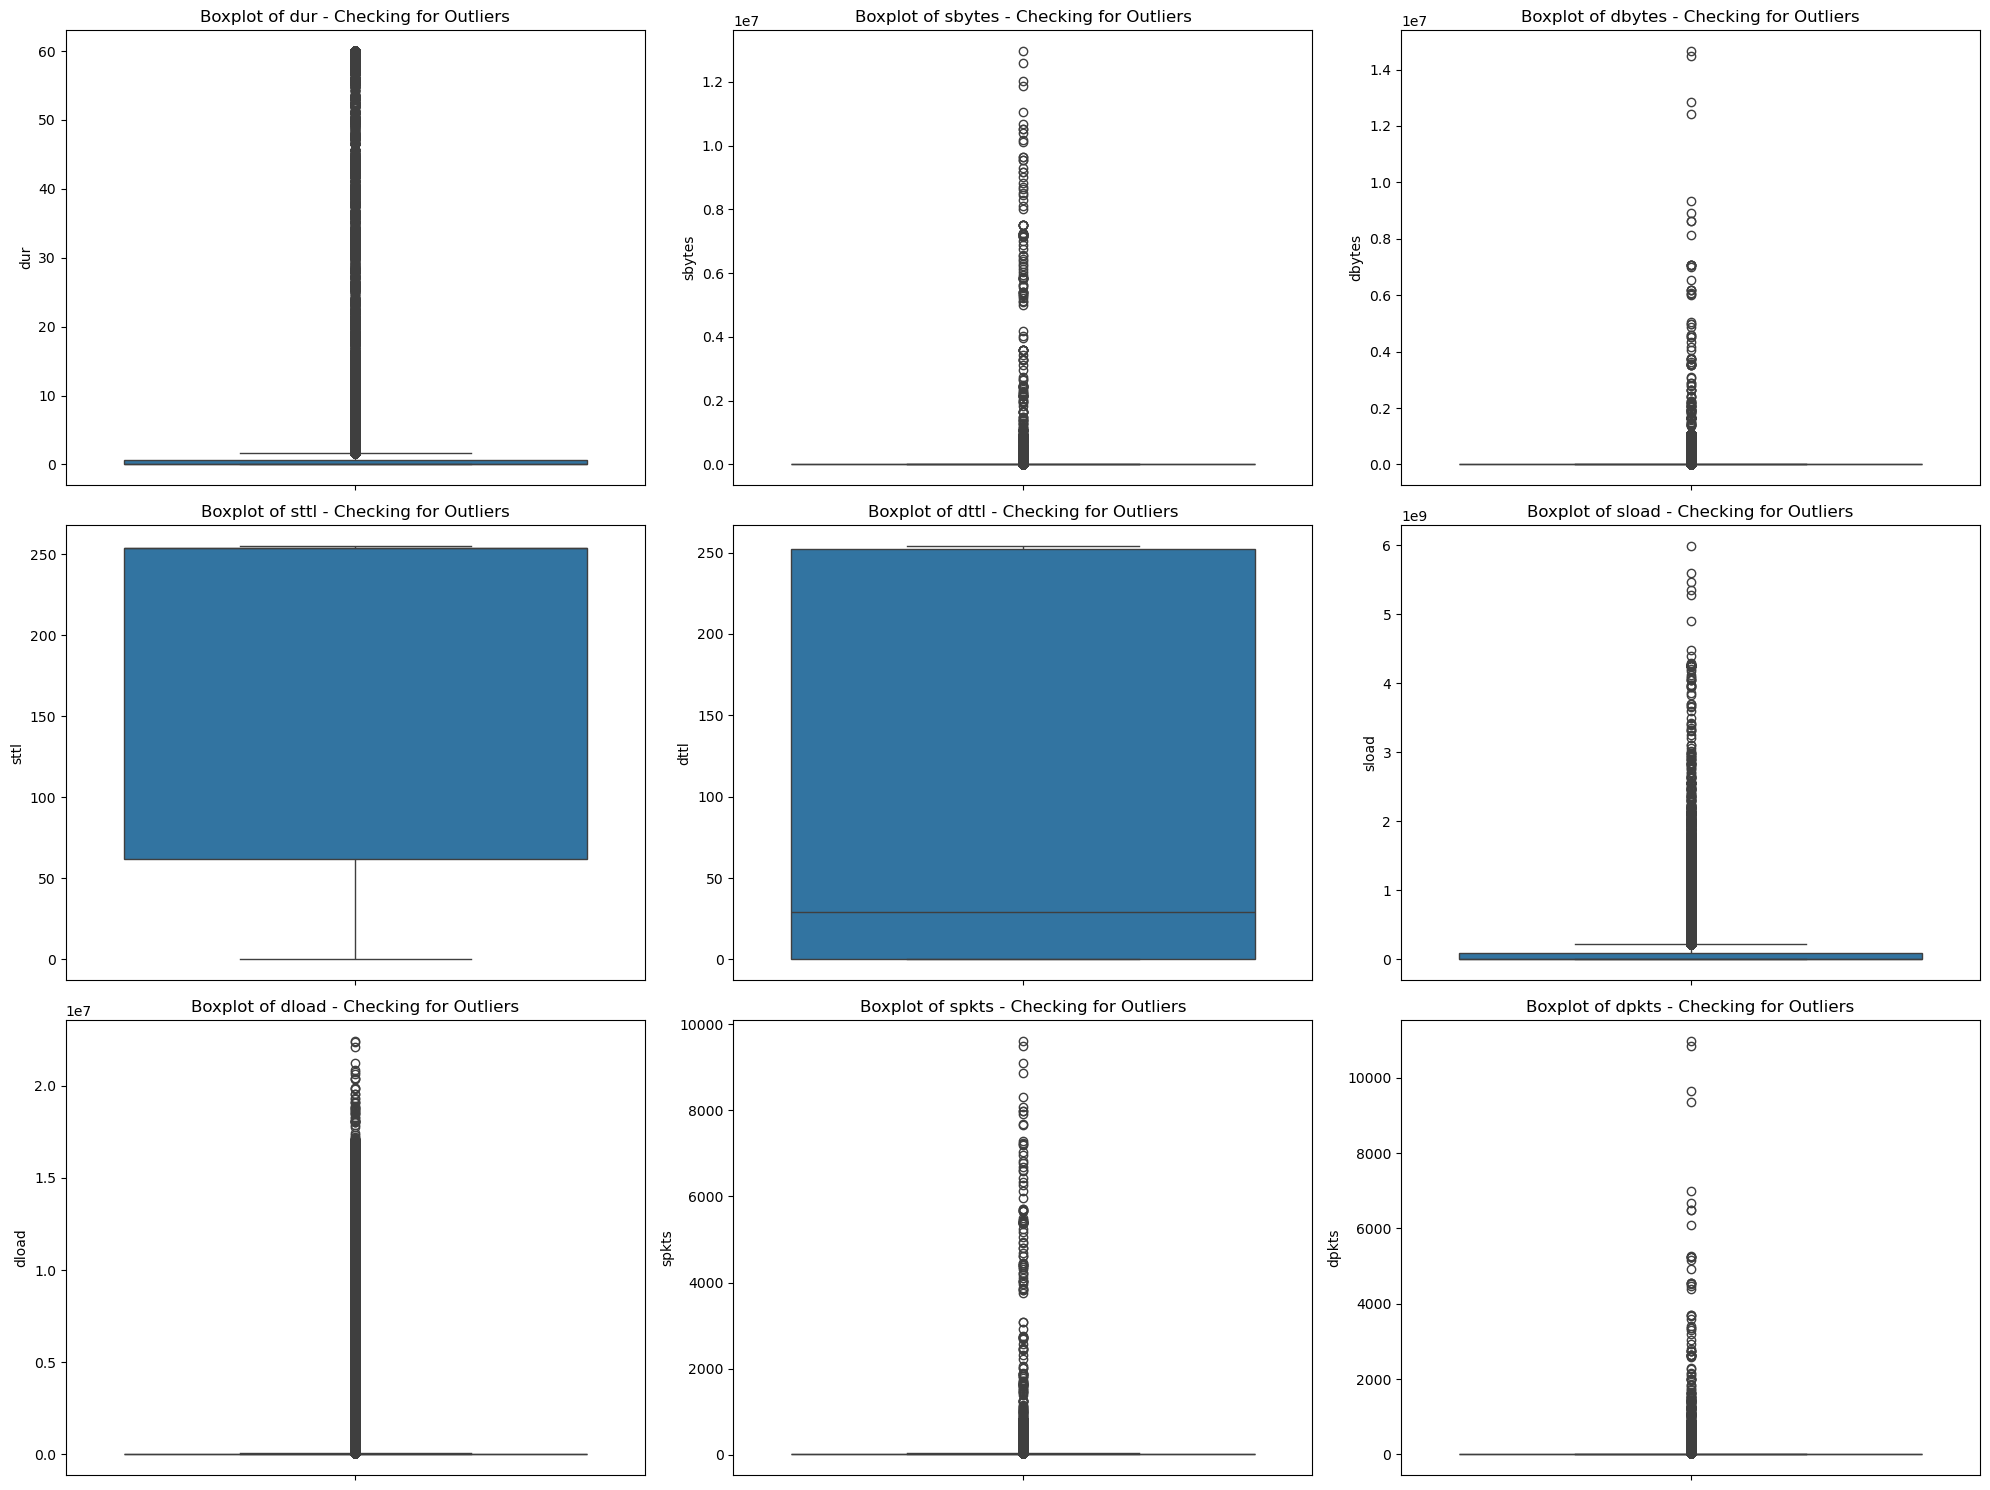

In [27]:
key_features = ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sload', 'dload', 'spkts', 'dpkts']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(key_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=feature, data=df)
    plt.title(f'Boxplot of {feature} - Checking for Outliers')
    plt.tight_layout()
plt.show()

### Why Outliers Should Not Be Handled Blindly

Removing outliers blindly can lead to inaccurate predictions because:

1. **Loss of Valuable Information**: Outliers might represent important, albeit rare, instances in the dataset. For example, in a network anomaly detection scenario, outliers may correspond to rare but critical attacks or anomalies that are essential for the model to identify. Removing them could cause the model to miss these key patterns.

2. **Distortion of Data Distribution**: Outliers can significantly affect the statistical properties of the data, such as the mean, standard deviation, or variance. Removing outliers without understanding their impact may distort the underlying distribution of the data, leading to inaccurate or biased predictions.

3. **Overfitting Risk**: If outliers are removed without careful consideration, the model may become overly sensitive to the data without these extremes, leading to overfitting. The model might perform exceptionally well on the modified data but fail to generalize on unseen data, especially if outliers represent rare but important cases.

### Better Approach: Algorithms That Handle Outliers

Instead of removing outliers, a better approach is to build models using algorithms that are robust to outliers or can naturally handle them. Some algorithms are designed to work well with data that contains outliers, and using them can help improve model performance without the need to discard potentially valuable information.

For example:
- **Tree-based models (e.g., Random Forest, XGBoost)**: These models are inherently robust to outliers because they split the data into regions based on feature values and focus on the majority of data points. Outliers do not significantly impact the splits, making them less sensitive to extreme values.
- **Ensemble methods**: Techniques like bagging or boosting combine multiple models to reduce the effect of outliers, as outliers will not heavily affect all the models in the ensemble.
- **Robust Regression**: In regression tasks, algorithms like **Ridge Regression** or **Robust Regression** can handle outliers more effectively by using methods like L2 regularization or iteratively reweighted least squares.

By choosing models that can handle outliers naturally, you maintain the integrity of the data while still making accurate predictions, without the risk of discarding valuable information.


### Correlation Matrix of Numerical Features  

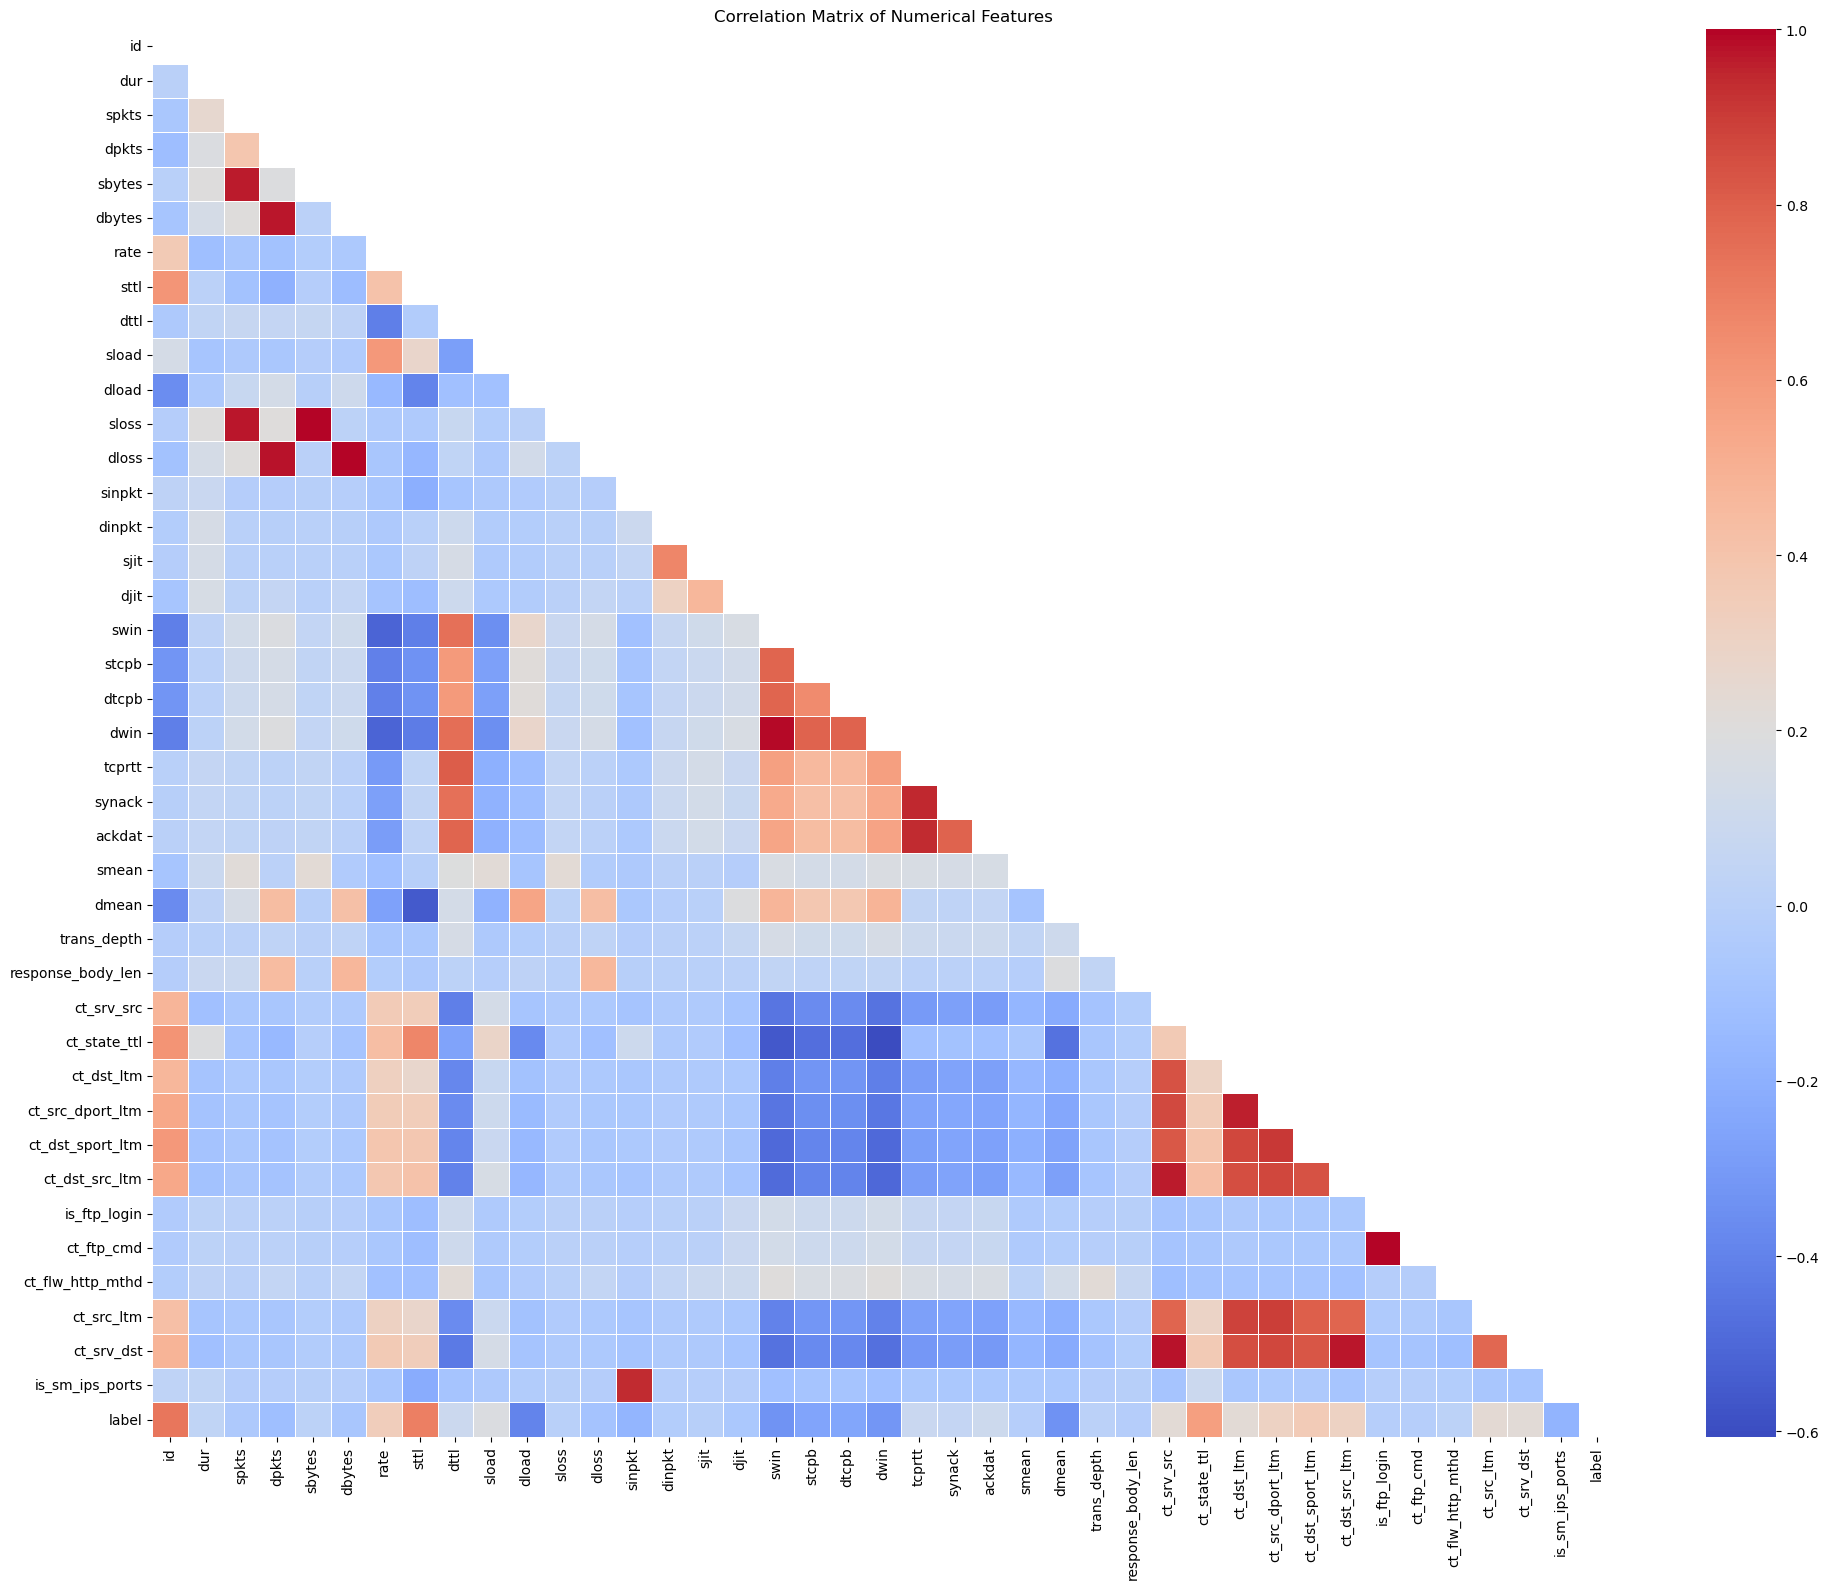

In [30]:
plt.figure(figsize=(20, 16))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation = df[numerical_cols].corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=False, mask=mask, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


## Correlation Matrix of Numerical Features

The heatmap represents the correlation matrix of the numerical features in the dataset. 

- The color intensity indicates the strength and direction of the correlation:
  - **Red shades** represent a high positive correlation (close to +1).
  - **Blue shades** indicate a strong negative correlation (close to -1).
  - **White or light shades** signify weak or no correlation.

### Why is the Correlation Matrix a Right-Angled Triangle?
The correlation matrix is symmetric, meaning that the correlation between feature A and feature B is the same as between feature B and feature A. To avoid redundancy and improve readability, only the lower (or upper) triangle is displayed. The diagonal is omitted because it always contains ones (a feature is always perfectly correlated with itself).

### Key Observations:
- Some features exhibit a high correlation, which might indicate redundancy in the dataset.
- Highly correlated features can be considered for removal to avoid multicollinearity issues.
- Features with strong negative correlations might have an inverse impact on the target variable.

This visualization helps in understanding feature relationships and selecting important variables for the anomaly detection model.

### Encoding Categorical Variables  

In [33]:
categorical_columns = ['proto', 'service', 'state', 'attack_cat']  
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print("Shape after encoding categorical features:", df_encoded.shape)
df_encoded.head()

Shape after encoding categorical features: (175341, 202)


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,state_no,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,1,0.121478,6,4,258,172,74.087490,252,254,14158.942380,...,False,False,False,False,False,False,True,False,False,False
1,2,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,...,False,False,False,False,False,False,True,False,False,False
2,3,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,...,False,False,False,False,False,False,True,False,False,False
3,4,1.681642,12,12,628,770,13.677108,62,252,2740.178955,...,False,False,False,False,False,False,True,False,False,False
4,5,0.449454,10,6,534,268,33.373826,254,252,8561.499023,...,False,False,False,False,False,False,True,False,False,False


In [34]:
df_encoded.dtypes

id                             int64
dur                          float64
spkts                          int64
dpkts                          int64
sbytes                         int64
                              ...   
attack_cat_Generic              bool
attack_cat_Normal               bool
attack_cat_Reconnaissance       bool
attack_cat_Shellcode            bool
attack_cat_Worms                bool
Length: 202, dtype: object

### Handling Missing Values & Removing Duplicate Rows  

In [36]:
if df_encoded.isnull().sum().sum() > 0:
    # Fill missing numerical values with median
    numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        if df_encoded[col].isnull().sum() > 0:
            df_encoded[col].fillna(df_encoded[col].median(), inplace=True)
            print(f"Filled missing values in {col} with median.")
    
    # Check if we still have missing values
    is_null_after = df_encoded.isnull().sum()
    print(f"Missing values after handling:\n {is_null_after}")
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [37]:
if is_duplicated > 0:
    df_encoded = df_encoded.drop_duplicates()
    print(f"Removed {is_duplicated} duplicate rows.")
    print(f"Shape after removing duplicates: {df_encoded.shape}")
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


### Feature selection using K-Best

Removing 146 features with zero variance within a class: ['is_sm_ips_ports', 'proto_a/n', 'proto_aes-sp3-d', 'proto_any', 'proto_argus', 'proto_aris', 'proto_arp', 'proto_ax.25', 'proto_bbn-rcc', 'proto_bna', 'proto_br-sat-mon', 'proto_cbt', 'proto_cftp', 'proto_chaos', 'proto_compaq-peer', 'proto_cphb', 'proto_cpnx', 'proto_crtp', 'proto_crudp', 'proto_dcn', 'proto_ddp', 'proto_ddx', 'proto_dgp', 'proto_egp', 'proto_eigrp', 'proto_emcon', 'proto_encap', 'proto_etherip', 'proto_fc', 'proto_fire', 'proto_ggp', 'proto_gmtp', 'proto_gre', 'proto_hmp', 'proto_i-nlsp', 'proto_iatp', 'proto_ib', 'proto_icmp', 'proto_idpr', 'proto_idpr-cmtp', 'proto_idrp', 'proto_ifmp', 'proto_igmp', 'proto_igp', 'proto_il', 'proto_ip', 'proto_ipcomp', 'proto_ipcv', 'proto_ipip', 'proto_iplt', 'proto_ipnip', 'proto_ippc', 'proto_ipv6', 'proto_ipv6-frag', 'proto_ipv6-no', 'proto_ipv6-opts', 'proto_ipv6-route', 'proto_ipx-n-ip', 'proto_irtp', 'proto_isis', 'proto_iso-ip', 'proto_iso-tp4', 'proto_kryptolan', 'pr

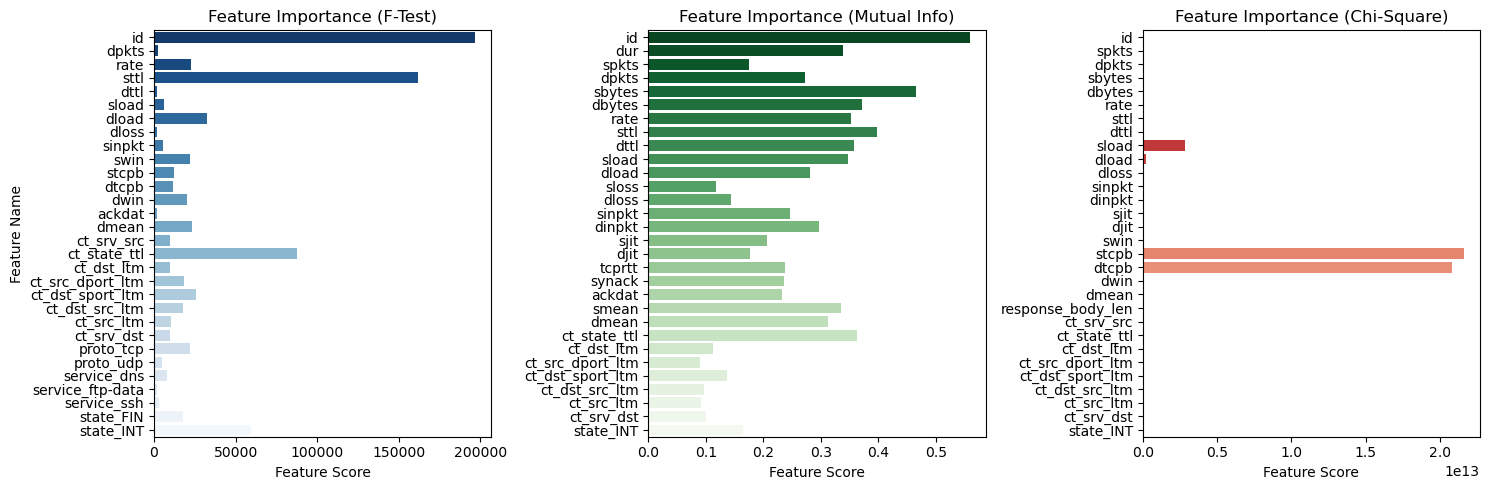

Shape of dataset after feature selection: (175341, 30)


In [39]:
# Separate Features & Target
X = df_encoded.drop(columns=['label'])  
y = df_encoded['label']

# Remove Zero-Variance Features (Globally)
zero_var_features = X.columns[X.nunique() == 1]
if len(zero_var_features) > 0:
    print(f"Removing {len(zero_var_features)} zero-variance features: {list(zero_var_features)}")
    X = X.drop(columns=zero_var_features)

# Remove Features with Zero Variance *Within Each Class (0 & 1)*
zero_var_per_class = []
for col in X.columns:
    if X[y == 0][col].nunique() == 1 or X[y == 1][col].nunique() == 1:
        zero_var_per_class.append(col)

if len(zero_var_per_class) > 0:
    print(f"Removing {len(zero_var_per_class)} features with zero variance within a class: {list(zero_var_per_class)}")
    X = X.drop(columns=zero_var_per_class)

# Feature Selection with k = 30
k = 30  

# ANOVA F-test
selector_f = SelectKBest(score_func=f_classif, k=k)
X_new_f = selector_f.fit_transform(X, y)
selected_features_f = X.columns[selector_f.get_support()]
scores_f = selector_f.scores_[selector_f.get_support()]

# Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_classif, k=k)
X_new_mi = selector_mi.fit_transform(X, y)
selected_features_mi = X.columns[selector_mi.get_support()]
scores_mi = selector_mi.scores_[selector_mi.get_support()]

# Chi-Square (Only for positive values)
selector_chi2 = SelectKBest(score_func=chi2, k=k)
X_new_chi2 = selector_chi2.fit_transform(X, y)
selected_features_chi2 = X.columns[selector_chi2.get_support()]
scores_chi2 = selector_chi2.scores_[selector_chi2.get_support()]

# Print Selected Features
print("Top Features (F-Test):", list(selected_features_f))
print("Top Features (Mutual Info):", list(selected_features_mi))
print("Top Features (Chi-Square):", list(selected_features_chi2))

plt.figure(figsize=(15, 5))

# ANOVA F-Test
plt.subplot(1, 3, 1)
sns.barplot(x=scores_f, y=selected_features_f, hue=selected_features_f, palette="Blues_r", legend=False)
plt.xlabel("Feature Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance (F-Test)")

# Mutual Information
plt.subplot(1, 3, 2)
sns.barplot(x=scores_mi, y=selected_features_mi, hue=selected_features_mi, palette="Greens_r", legend=False)
plt.xlabel("Feature Score")
plt.ylabel("")
plt.title("Feature Importance (Mutual Info)")

# Chi-Square
plt.subplot(1, 3, 3)
sns.barplot(x=scores_chi2, y=selected_features_chi2, hue=selected_features_chi2, palette="Reds_r", legend=False)
plt.xlabel("Feature Score")
plt.ylabel("")
plt.title("Feature Importance (Chi-Square)")

plt.tight_layout()
plt.show()
# Select Final Features (Example: ANOVA F-Test)
X_selected = X[selected_features_f]

# Display selected feature set shape
print("Shape of dataset after feature selection:", X_selected.shape)


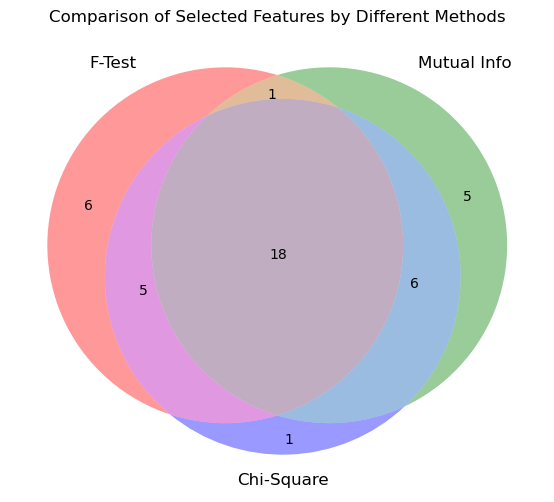

In [40]:
from matplotlib_venn import venn3

# Define feature sets
features_f_test = set(['id', 'dpkts', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'dloss', 'sinpkt', 'swin', 
                       'stcpb', 'dtcpb', 'dwin', 'ackdat', 'dmean', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 
                       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 
                       'proto_tcp', 'proto_udp', 'service_dns', 'service_ftp-data', 'service_ssh', 'state_FIN', 'state_INT'])

features_mutual_info = set(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 
                            'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'tcprtt', 'synack', 
                            'ackdat', 'smean', 'dmean', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 
                            'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'state_INT'])

features_chi2 = set(['id', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 
                     'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'dmean', 
                     'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 
                     'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'state_INT'])

# Create Venn diagram
plt.figure(figsize=(8,6))
venn3([features_f_test, features_mutual_info, features_chi2], 
      ('F-Test', 'Mutual Info', 'Chi-Square'))

plt.title("Comparison of Selected Features by Different Methods")
plt.show()

In [41]:
# Selecting features based on Mutual Information
selected_features = ['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 
                     'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'tcprtt', 'synack', 
                     'ackdat', 'smean', 'dmean', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 
                     'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst', 'state_INT']

# Updating dataset with only selected features
X_selected = X[selected_features]

# Display final shape after feature selection
print("Final dataset shape after Mutual Information feature selection:", X_selected.shape)


Final dataset shape after Mutual Information feature selection: (175341, 30)


### Why Mutual Information was Chosen for Feature Selection

Mutual Information (MI) was selected as the most effective feature selection method for the network anomaly detection problem using the UNSW-NB15 dataset due to the following reasons:

- **Captures Non-Linear Relationships**: MI can detect non-linear patterns between features, which is important for network traffic data where relationships might not be strictly linear.
  
- **Handles Mixed Feature Types**: The UNSW-NB15 dataset contains both continuous (e.g., 'rate', 'sbytes') and categorical (e.g., 'service_dns', 'state_FIN') features. MI works well with both types of data.

- **Prioritizes Informative Features**: MI identifies key features like 'id', 'dpkts', 'rate', 'sload', and 'dload' that are crucial for detecting network anomalies, improving model accuracy.

- **Robust to Noise**: MI naturally filters out irrelevant or weakly correlated features, reducing the risk of overfitting and ensuring a generalized model.

- **Complementary to Other Methods**: Unlike F-Test and Chi-Square, MI captures both linear and non-linear relationships, providing a comprehensive view of feature importance.

In summary, **Mutual Information** is ideal for this task as it handles diverse data types, captures complex relationships, and selects the most relevant features for accurate anomaly detection.


### Train and Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (140272, 30)
Test Set Shape: (35069, 30)


### Scaling

In [46]:
# Initialize RobustScaler
scaler = RobustScaler()

# Fit and transform on training data, transform on test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier analysis
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the new shape after scaling
print("Training Set Shape (After Scaling):", X_train_scaled.shape)
print("Test Set Shape (After Scaling):", X_test_scaled.shape)


Training Set Shape (After Scaling): (140272, 30)
Test Set Shape (After Scaling): (35069, 30)


In [47]:
correlation_with_target = X_train.corrwith(y_train)
high_corr_features = correlation_with_target[correlation_with_target.abs() > 0.8]  # Adjust threshold if needed

if not high_corr_features.empty:
    print(" Potential Feature Leakage! High correlation with target:\n", high_corr_features)
else:
    print(" No direct feature leakage detected.")

 No direct feature leakage detected.


In [48]:
# Check Information Leakage (Duplicates in Train & Test)
common_samples = X_train.merge(X_test, how='inner')
if len(common_samples) > 0:
    print(f" {len(common_samples)} duplicated samples found in Train & Test. Possible Information Leakage!")
else:
    print(" No duplicate samples between Train & Test.")


 No duplicate samples between Train & Test.


### Model Training

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Initialize models
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "LightGBM": LGBMClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store trained models and results
trained_models = {}
results = {}

# Train and evaluate models
for name, model in models.items():
    print(f" Training {name}...")
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model  # Store trained model
    
    # Training accuracy
    train_preds = model.predict(X_train_scaled)
    train_acc = accuracy_score(y_train, train_preds)
    
    # Testing accuracy
    test_preds = model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, test_preds)
    
    # Store results
    results[name] = {"Train Accuracy": train_acc, "Test Accuracy": test_acc}
    
    print(f" {name} - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}\n")

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(" Model Performance Summary:\n", results_df)

 Training XGBoost...
 XGBoost - Train Accuracy: 0.9976, Test Accuracy: 0.9940

 Training Random Forest...
 Random Forest - Train Accuracy: 1.0000, Test Accuracy: 0.9897

 Training KNN...
 KNN - Train Accuracy: 0.9685, Test Accuracy: 0.9542

 Training LightGBM...
[LightGBM] [Info] Number of positive: 95472, number of negative: 44800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5389
[LightGBM] [Info] Number of data points in the train set: 140272, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680621 -> initscore=0.756625
[LightGBM] [Info] Start training from score 0.756625
 LightGBM - Train Accuracy: 0.9945, Test Accuracy: 0.9925

 Training Naive Bayes...
 Naive Bayes - Train Accuracy: 0.8086, Test Accuracy: 0.8093

 Model Performance Summary:
      

### Model Performance Summary

The following table presents the training and test accuracy for various models, which were evaluated to assess their overfitting and generalization capability:

| Model            | Train Accuracy | Test Accuracy  |
|------------------|----------------|----------------|
| **XGBoost**      | 0.9976         | 0.9940         |
| **Random Forest**| 1.0000         | 0.9897         |
| **KNN**          | 0.9685         | 0.9542         |
| **LightGBM**     | 0.9945         | 0.9925         |
| **Naive Bayes**  | 0.8086         | 0.8093         |

### Key Insights:
- **XGBoost** demonstrated the highest train accuracy while maintaining a very close test accuracy, indicating its strong generalization ability with minimal overfitting.
- **Random Forest** achieved perfect training accuracy, but its test accuracy is slightly lower, suggesting a possible overfitting tendency.
- **KNN** has a lower train accuracy and test accuracy, pointing to a less effective model compared to others.
- **LightGBM** performed well with a small gap between train and test accuracy, showing solid performance without significant overfitting.
- **Naive Bayes** showed the lowest performance in terms of both train and test accuracy, suggesting it might not be well-suited for this classification task.

In conclusion, **XGBoost** appears to be the best-performing model, followed by **LightGBM**, based on the balance between training and test accuracy.


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define a function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        'Precision': precision_score(y_test, y_test_pred, average='weighted'),
        'Recall': recall_score(y_test, y_test_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_test_pred, average='weighted')
    }
    
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_test_pred))
    
    return model_name, metrics

# Store results
model_results = {}

# Evaluate each model
for model_name, model in trained_models.items():  # Assuming trained_models is a dictionary {name: model_object}
    model_name, metrics = evaluate_model(model, X_train, y_train, X_test, y_test, model_name)
    model_results[model_name] = metrics

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame.from_dict(model_results, orient='index')
print(results_df)



Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11200
           1       0.68      1.00      0.81     23869

    accuracy                           0.68     35069
   macro avg       0.34      0.50      0.40     35069
weighted avg       0.46      0.68      0.55     35069


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.01      0.00      0.00     11200
           1       0.63      0.81      0.71     23869

    accuracy                           0.55     35069
   macro avg       0.32      0.41      0.36     35069
weighted avg       0.43      0.55      0.49     35069


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.61      0.79      0.69     11200
           1       0.88      0.76      0.82     23869

    accuracy                           0.77     35069
   macro avg      

### Model Performance Summary with Precision, Recall, and F1 Score

The following table presents the precision, recall, and F1 score for various models evaluated:

| Model            | Precision | Recall   | F1 Score |
|------------------|-----------|----------|----------|
| **XGBoost**      | 0.4633    | 0.6806   | 0.5513   |
| **Random Forest**| 0.4337    | 0.5535   | 0.4859   |
| **KNN**          | 0.7954    | 0.7697   | 0.7759   |
| **LightGBM**     | 0.4633    | 0.6806   | 0.5513   |
| **Naive Bayes**  | 0.8086    | 0.7580   | 0.7055   |

### Key Insights:
- **Naive Bayes** shows the highest precision, recall, and F1 score, making it a strong performer in classifying the positive class.
- **KNN** follows closely with a high precision and F1 score, demonstrating a good balance between precision and recall.
- **XGBoost** and **LightGBM** have equal precision, recall, and F1 score, performing adequately but not as well as Naive Bayes or KNN.
- **Random Forest** has the lowest precision and F1 score, suggesting it might not be as effective for this specific task compared to the other models.


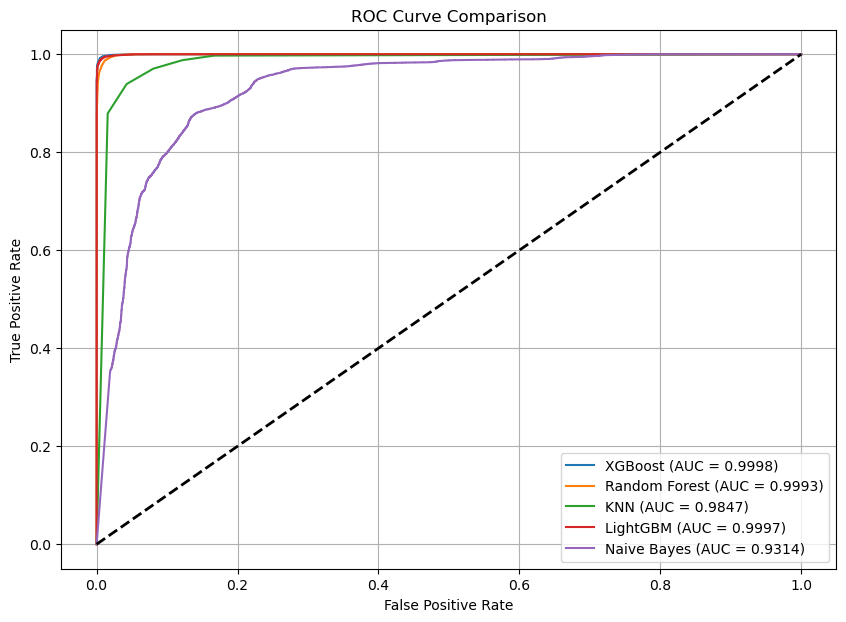

In [54]:
from sklearn.metrics import roc_curve, auc

# Plot ROC Curve for all models
plt.figure(figsize=(10, 7))

for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Get probability scores for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)  # Compute ROC curve
    roc_auc = auc(fpr, tpr)  # Compute AUC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Plotting aesthetics
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# ROC Curves and AUC Values Explained

## Overview of ROC Curves
The ROC (Receiver Operating Characteristic) curve is a graphical representation that illustrates the performance of a binary classification model across various threshold settings. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR).

## Key Components
- **X-axis**: False Positive Rate (FPR) = FP / (FP + TN)
- **Y-axis**: True Positive Rate (TPR) = TP / (TP + FN)
- **Diagonal Line**: Represents random chance (AUC = 0.5)

## AUC Values in the Image
| Model            | AUC Value |
|------------------|-----------|
| **LightGBM**      | 0.9997    |
| **XGBoost**       | 0.9998    |
| **Random Forest** | 0.9993    |
| **KNN**           | 0.9847    |
| **Naive Bayes**   | 0.9314    |

## Interpreting ROC and AUC
- **AUC = 1.0**: Perfect classifier
- **AUC > 0.9**: Excellent classifier
- **0.7 < AUC < 0.9**: Good classifier
- **0.5 < AUC < 0.7**: Poor classifier
- **AUC = 0.5**: Random classifier (no discriminative power)

## Analysis of Model Performance
- **Top Performers**: XGBoost, LightGBM, and Random Forest all achieve near-perfect classification (AUC > 0.999)
- **Good Performer**: KNN shows strong performance (AUC = 0.9847)
- **Lowest Performer**: Naive Bayes still performs well (AUC = 0.9314) but shows more trade-offs between TPR and FPR

## Practical Implications
- Higher curves (closer to the top-left corner) indicate better model performance.
- The steep initial rise of LightGBM, XGBoost, and Random Forest curves indicates these models can achieve high TPR with minimal FPR.
- Naive Bayes shows a more gradual curve, suggesting more balanced trade-offs between sensitivity and specificity.

## Model Selection Considerations
When choosing between these models, consider:
- **Threshold selection**: Based on specific application needs (e.g., minimizing false positives or false negatives).
- **Computational efficiency**: The performance of these models in terms of time and resources.
- **Model interpretability**: Depending on the need for transparency in decision-making.
- **Domain-specific constraints**: The cost of false positives vs. false negatives can significantly impact the choice of model.

## Conclusion
Based on the ROC curve comparison, **XGBoost** is the best performing model with an **AUC value of 0.9998**. While **LightGBM** follows extremely closely with an AUC of **0.9997**, XGBoost edges it out by a tiny margin of 0.0001. Both models demonstrate nearly perfect classification ability, but XGBoost has the highest numerical AUC score in the comparison.

The difference between the top models (**XGBoost**, **LightGBM**, and **Random Forest**) is minimal in practical terms, and any of them would likely perform excellently on this classification task.
ignificantly impact the choice of model.


### Over Fit Check and Cross Validation with Regularization parameters

In [57]:
from sklearn.model_selection import cross_val_score

# Define the models with regularization parameters
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, alpha=0.1, reg_lambda=0.1),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights='distance'),
    "LightGBM": LGBMClassifier(random_state=42, lambda_l1=0.1, lambda_l2=0.1),
    "Naive Bayes": GaussianNB(var_smoothing=1e-9)
}

# Function to check overfitting using Train vs Test accuracy
def check_overfitting(models, X_train, y_train, X_test, y_test):
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        # Calculate training and test accuracy
        train_preds = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_preds)
        
        test_preds = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_preds)
        
        results[name] = {"Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy}
    
    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results).T
    return results_df

# Function to check cross-validation performance
def check_cross_validation(models, X_train, y_train):
    cross_val_results = {}
    
    for name, model in models.items():
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        cross_val_results[name] = {"Cross Validation Mean": cv_scores.mean(), "Cross Validation Std": cv_scores.std()}
    
    return pd.DataFrame(cross_val_results).T

# Check for overfitting using training vs test accuracy
results_df = check_overfitting(models, X_train_scaled, y_train, X_test_scaled, y_test)

# Check for overfitting using cross-validation
cross_val_results_df = check_cross_validation(models, X_train_scaled, y_train)

# Display the final results
print("\n Final Overfitting Check (Train vs Test Accuracy):\n", results_df)
print("\n Final Cross-Validation Check:\n", cross_val_results_df)

[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Number of positive: 95472, number of negative: 44800
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5389
[LightGBM] [Info] Number of data points in the train set: 140272, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.680621 -> initscore=0.756625
[LightGBM] [Info] Start training from score 0.756625
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lamb

# Model Performance Summary

## Final Overfitting Check (Train vs Test Accuracy)
| Model            | Train Accuracy | Test Accuracy |
|------------------|----------------|---------------|
| **XGBoost**      | 0.9980         | 0.9939        |
| **Random Forest**| 0.9757         | 0.9764        |
| **KNN**          | 1.0000         | 0.9587        |
| **LightGBM**     | 0.9946         | 0.9923        |
| **Naive Bayes**  | 0.8086         | 0.8093        |

### Key Observations:
- **XGBoost** shows a very high train accuracy of 0.9980 and test accuracy of 0.9939, indicating it is not overfitting and performs excellently on both training and test data.
- **Random Forest** exhibits similar performance with a minor difference between train and test accuracy, which suggests it is also generalizing well.
- **KNN** achieves perfect training accuracy (1.0000), but there is a significant gap with the test accuracy (0.9587), indicating potential overfitting or the need for better hyperparameter tuning.
- **LightGBM** shows strong performance with minimal discrepancy between train and test accuracy, similar to XGBoost.
- **Naive Bayes** has the lowest accuracy across all models, which may indicate suboptimal performance on this dataset.

## Final Cross-Validation Check
| Model            | Cross Validation Mean | Cross Validation Std |
|------------------|-----------------------|----------------------|
| **XGBoost**      | 0.9938                | 0.0005               |
| **Random Forest**| 0.9751                | 0.0010               |
| **KNN**          | 0.9561                | 0.0010               |
| **LightGBM**     | 0.9923                | 0.0004               |
| **Naive Bayes**  | 0.8088                | 0.0024               |

### Key Observations:
- **XGBoost** has the highest cross-validation mean score (0.9938), with minimal standard deviation, confirming its stability and robustness.
- **Random Forest** and **LightGBM** both show good cross-validation performance, with Random Forest having a slightly lower mean score but still performing well.
- **KNN**'s cross-validation performance is strong, but its higher variance suggests that the model's performance could be sensitive to different folds of the data.
- **Naive Bayes** performs poorly in cross-validation as well, with a low mean and relatively high standard deviation, reflecting its less reliable performance.

## Conclusion
- **XGBoost** stands out as the best-performing model with high accuracy and stable cross-validation performance. It is a strong choice for this classification task.
- **LightGBM** and **Random Forest** also demonstrate excellent performance, making them solid alternatives to XGBoost.
- **KNN** requires further tuning to reduce overfitting, and **Naive Bayes** shows relatively weak performance across both training and testing phases.


### Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define the XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 4, 5, 6],          # Depth of the tree
    'learning_rate': [0.01, 0.05, 0.1], # Learning rate
    'n_estimators': [50, 100, 200],     # Number of boosting rounds
    'reg_alpha': [0, 0.1, 0.5],         # L1 regularization
    'reg_lambda': [0, 0.1, 0.5]         # L2 regularization
}

# Set up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, 
                           scoring='accuracy', verbose=1, n_jobs=-1)

# Perform the grid search on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# Train the model with the best parameters on the entire training set
best_xgb = grid_search.best_estimator_

# Evaluate on the test set
test_preds = best_xgb.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_preds)

print("\nTest Accuracy after Hyperparameter Tuning:", test_accuracy)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 0.1}
Best Cross-Validation Accuracy: 0.9932131901790798

Test Accuracy after Hyperparameter Tuning: 0.9932418945507429


# Hyperparameter Tuning Summary

## Hyperparameter Tuning Process
Despite the fact that **XGBoost** was already performing excellently in terms of both training and testing accuracy, we chose to perform hyperparameter tuning to further optimize its performance. The grid search process involved testing 324 different combinations of hyperparameters over 5-fold cross-validation, totaling 1620 individual fits.

## Best Hyperparameters
After completing the grid search, the best hyperparameters were identified as:
- **Learning Rate**: 0.1
- **Max Depth**: 6
- **Number of Estimators (n_estimators)**: 200
- **Regularization Alpha (reg_alpha)**: 0.5
- **Regularization Lambda (reg_lambda)**: 0.1

## Cross-Validation Performance
The best cross-validation accuracy achieved after hyperparameter tuning was **0.9932**, which is slightly lower than the performance before tuning (0.9938). However, this minor difference could be due to the specific folds or the randomness inherent in the cross-validation process.

## Test Accuracy After Tuning
The **test accuracy** after hyperparameter tuning came out to be **0.9932**, which is very similar to the accuracy before tuning (0.9939). This further confirms that the model was already performing well before the tuning and that the adjustments to the hyperparameters resulted in negligible improvements on the test set.

## Why Perform Hyperparameter Tuning?
Although there was no pressing need to tune the hyperparameters, we decided to proceed with the tuning for several reasons:
1. **Fine-Tuning for Optimal Performance**: While the model was already performing well, hyperparameter tuning allows us to explore the possibility of further improving accuracy.
2. **Ensuring Robustness**: By tuning the hyperparameters, we can ensure that the model is not just performing well on the current dataset but is also robust and generalized for other similar datasets.
3. **Model Confidence**: Hyperparameter tuning helps confirm that the selected hyperparameters are indeed the best fit for the model and that performance could be slightly improved with optimal settings.

## Conclusion
- The performance improvement after hyperparameter tuning is minimal, as expected, given that the model was already performing at a high level.
- Hyperparameter tuning serves as a final step in ensuring that the model's performance is maximized and as robust as possible, even when the gains might not be large.
- **XGBoost** continues to be the best model with excellent test accuracy, even without the need for tuning.
